# Lesson: CLUSTERING - Modeling
<a href = "https://www.canva.com/design/DAFjMCR_7wg/Ixd3ONOru1f5C7VLTb1xCQ/view?utm_content=DAFjMCR_7wg&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink"> 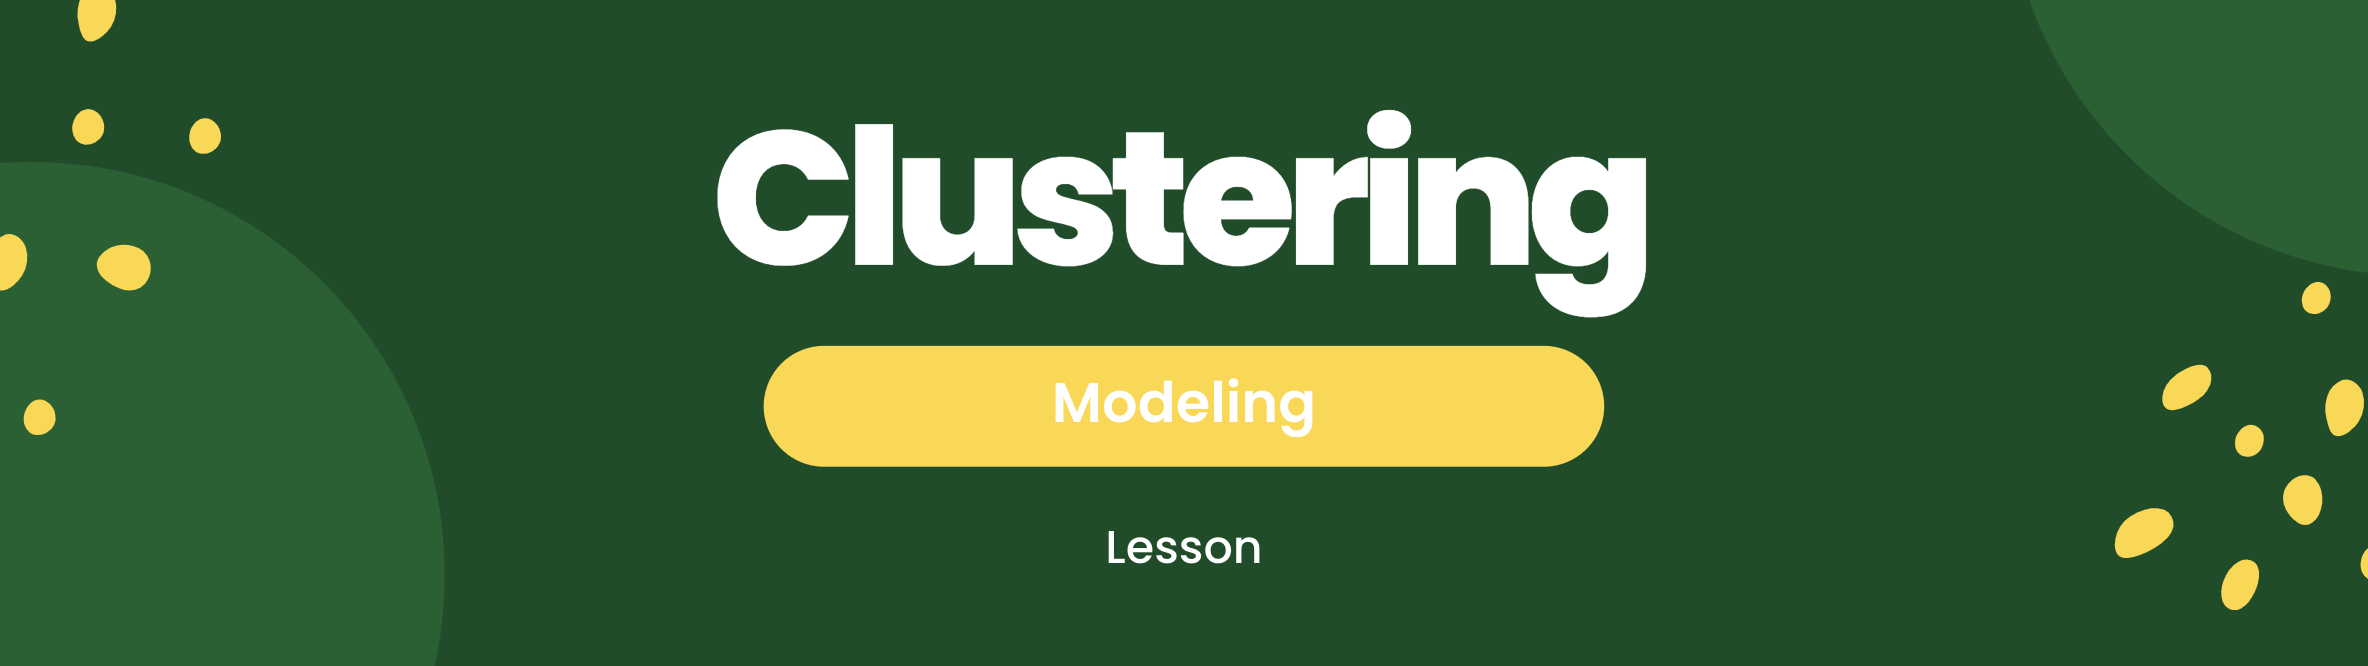</a>



<hr style="border:2px solid gray">

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

# module for visualizations
import viz_kmeans
# # Define your custom color palette
# custom_palette = ['#2095DF', '#81DF20', '#DF2020']

# # Set the custom palette as the default for Seaborn
# sns.set_palette(custom_palette)

# Data Acquisition

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


# Data Preparation

#### *Let's fix the column names by making everything lower case and replacing the dot separator with an underscore*

In [3]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# define independent variables for k-means

X = df[['petal_length', 'sepal_length']]
X.head()

,petal_length,sepal_length
1,1.4,5.1
2,1.4,4.9
3,1.3,4.7
4,1.5,4.6
5,1.4,5.0


# Modeling

### Create and Fit cluster model

In [5]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

### Add cluster to our original data

In [6]:
# make a new column names cluster in iris and X dataframe

df['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1


In [7]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
138,6.4,3.1,5.5,1.8,virginica,0
70,5.6,2.5,3.9,1.1,versicolor,2
121,6.9,3.2,5.7,2.3,virginica,0
109,6.7,2.5,5.8,1.8,virginica,0
59,6.6,2.9,4.6,1.3,versicolor,2
78,6.7,3.0,5.0,1.7,versicolor,0
135,6.1,2.6,5.6,1.4,virginica,0
96,5.7,3.0,4.2,1.2,versicolor,2
148,6.5,3.0,5.2,2.0,virginica,0
84,6.0,2.7,5.1,1.6,versicolor,2


### Visualize Clusters

In [8]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,1.00
versicolor,5.936,2.770,4.260,1.326,1.82
virginica,6.588,2.974,5.552,2.026,0.52


[Text(0.5, 1.0, 'K-Means Clusters')]

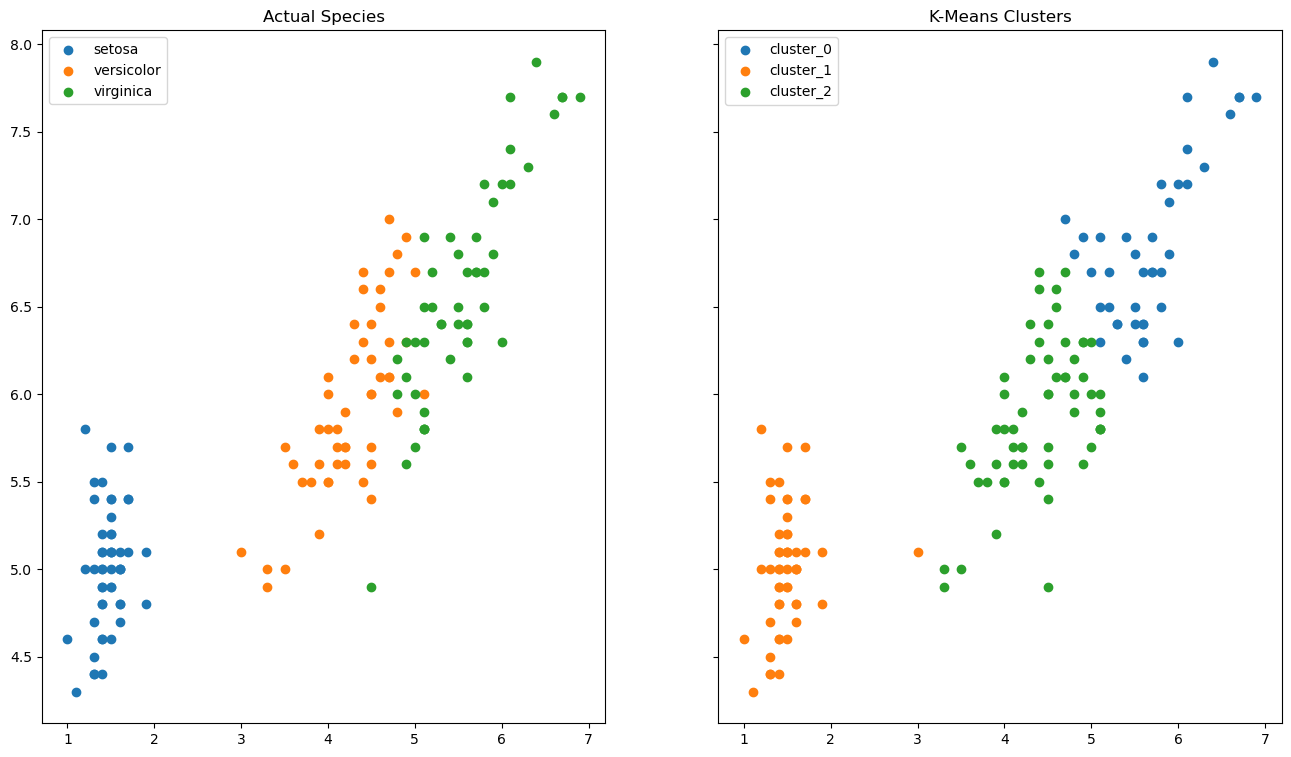

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    axs[0].scatter(subset.petal_length, subset.sepal_length, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in df.cluster.sort_values().unique():
    axs[1].scatter(df[df.cluster == cluster_n].petal_length, df[df.cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

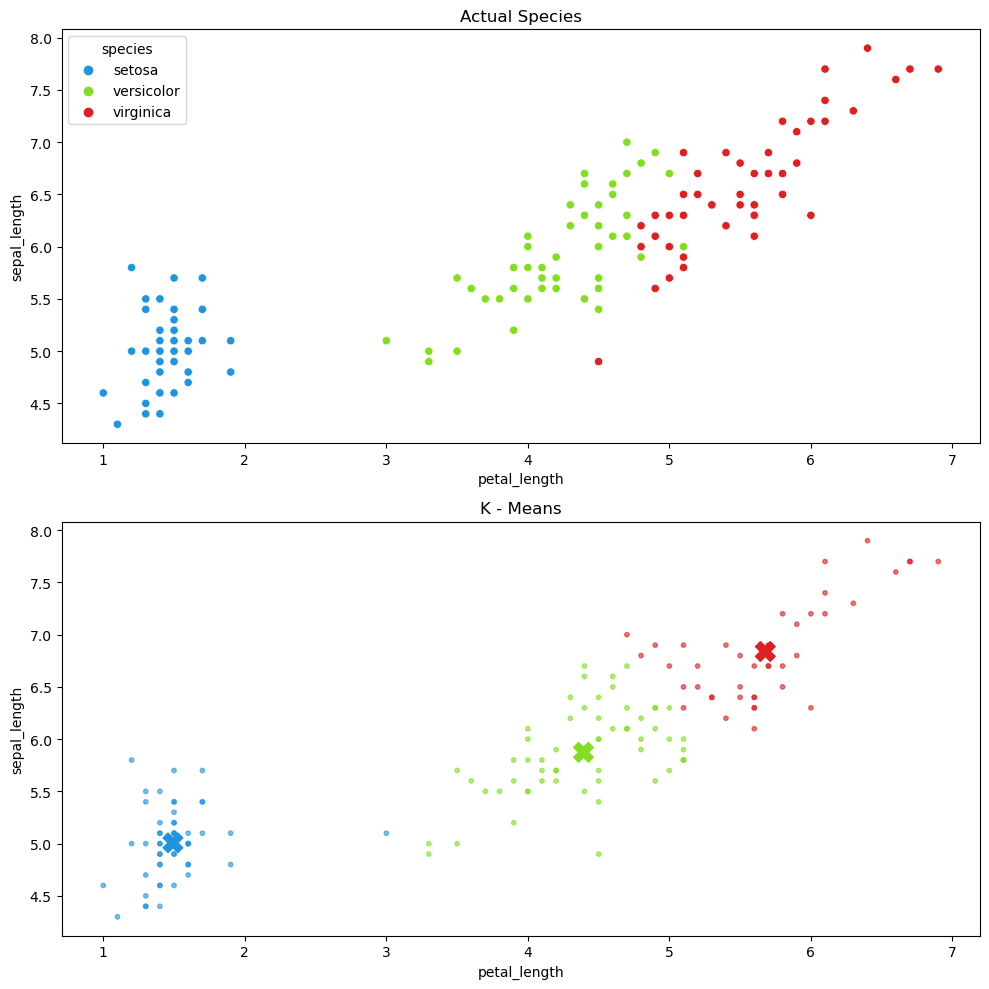

In [10]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(df)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">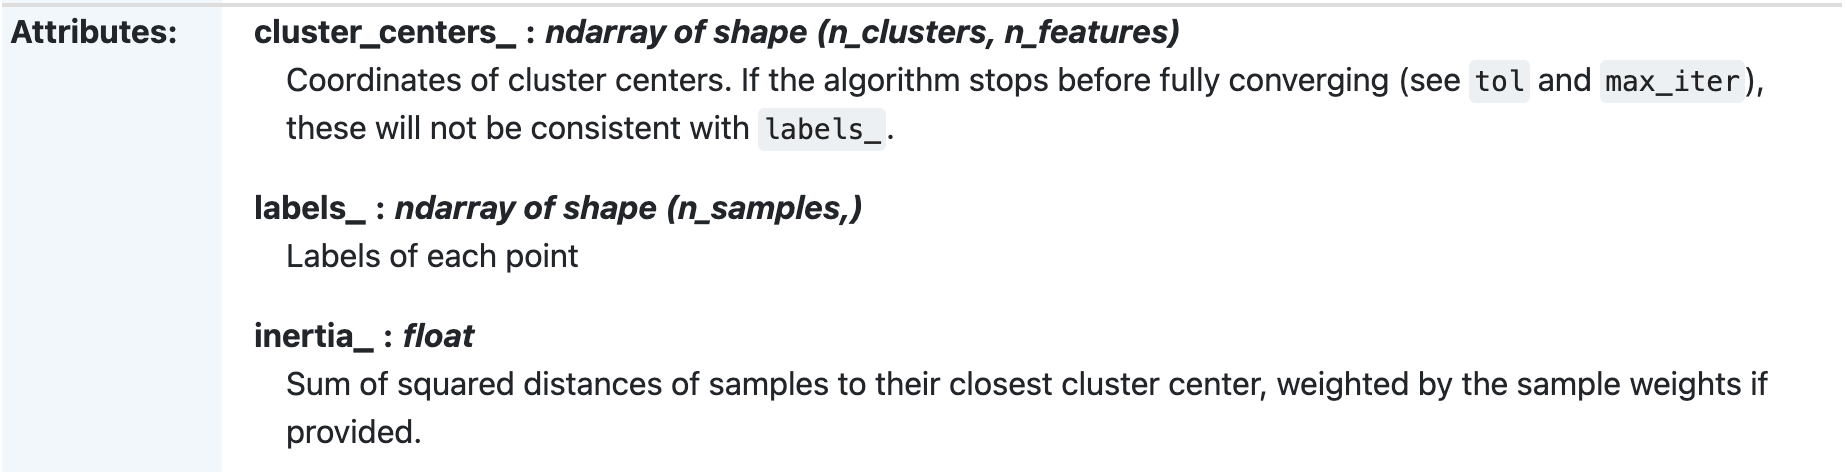</a>

In [11]:
# Cluster Centers aka centroids. -- The output is also not scaled; it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_

array([[5.67804878, 6.83902439],
       [1.49215686, 5.00784314],
       [4.39310345, 5.87413793]])

In [12]:
# Make a dataframe 

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:2])
centroids

,petal_length,sepal_length
0,5.678049,6.839024
1,1.492157,5.007843
2,4.393103,5.874138


In [13]:
#  Find the mean of the original df and groupby cluster

df.groupby('cluster')['petal_length', 'sepal_length'].mean()

,petal_length,sepal_length
cluster,,
0,5.678049,6.839024
1,1.492157,5.007843
2,4.393103,5.874138


In [14]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

When `cluster` was an numeric column, sns automatically applied a sequential color palette by default. 

By converting `cluster` to a string column, sns recognized it as a **categorical** variable, allowing you to assign custom colors using a palette.

In [15]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


<Figure size 1400x900 with 0 Axes>

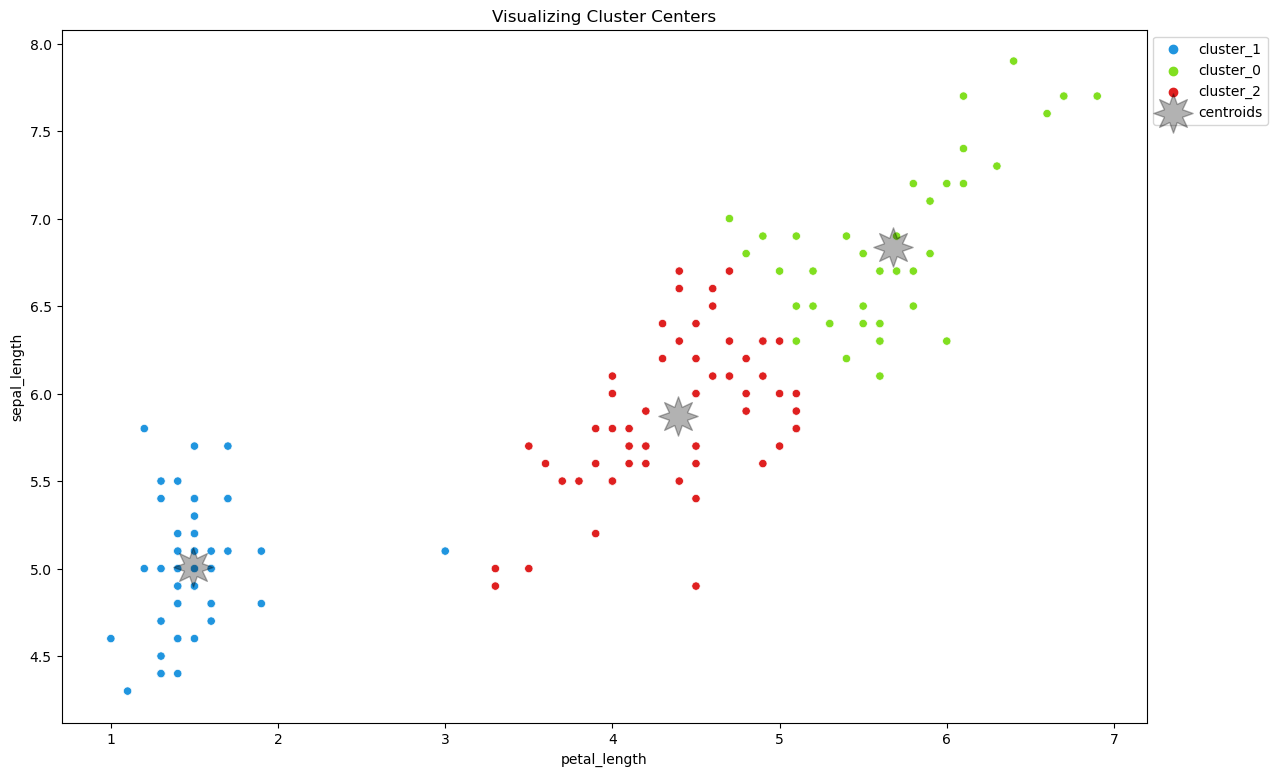

In [19]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = df, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_length', y = 'sepal_length', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = df['cluster'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');



## How to choose 'k'

#### *A priori* knowledge about application domain/educated guess
-  How many five different types of bacteria in the world (k = 5)
- There are two different kinds of people in world (k = 2)

#### Search for a 'good' k value
- Try different k values and evaluate results
    - *Inertia* = Within Cluster Sum of Squared (WCSS) distances from each point to it's assigned centroid  
        - minimize inertia
    - Use elbow method (using inertia) to choose k



In [17]:
kmeans.inertia_

53.809978644106934

In [20]:
k = 2

kmeans = KMeans(n_clusters= k)
kmeans.fit(X)
kmeans.inertia_

209.76498346625172

In [21]:
k = 3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X)
kmeans.inertia_

53.809978644106934

In [22]:
k = 4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X)
kmeans.inertia_

40.201304878048774

In [23]:
k = 5

kmeans = KMeans(n_clusters= k)
kmeans.fit(X)
kmeans.inertia_

26.776689655172415

# Elbow Method:
1. Examine the resulting plot, looking for the "elbow" point, which is the value of k where the decrease in WCSS *starts to level off significantly*.

- The elbow point represents a trade-off between reducing the WCSS (increasing the number of clusters) and keeping the model simple.

- The elbow method provides a guideline to assist in selecting a suitable value for k, but it should be combined with *domain knowledge* and other evaluation metrics for a comprehensive analysis.

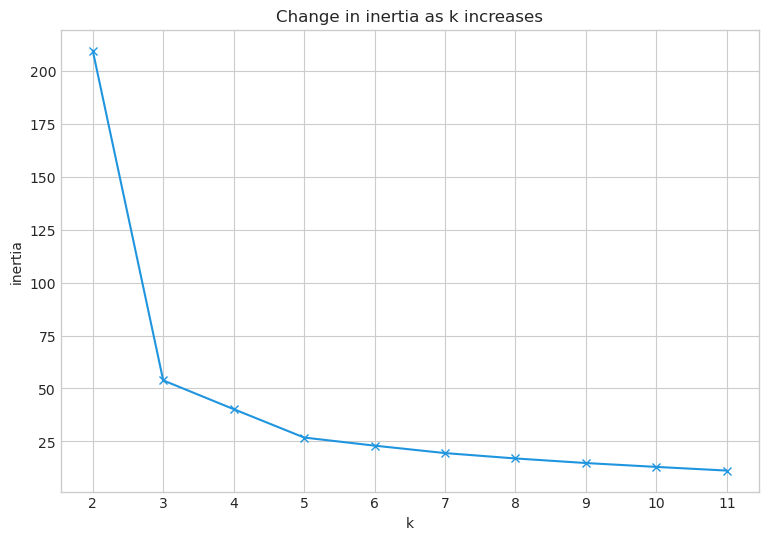

In [24]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

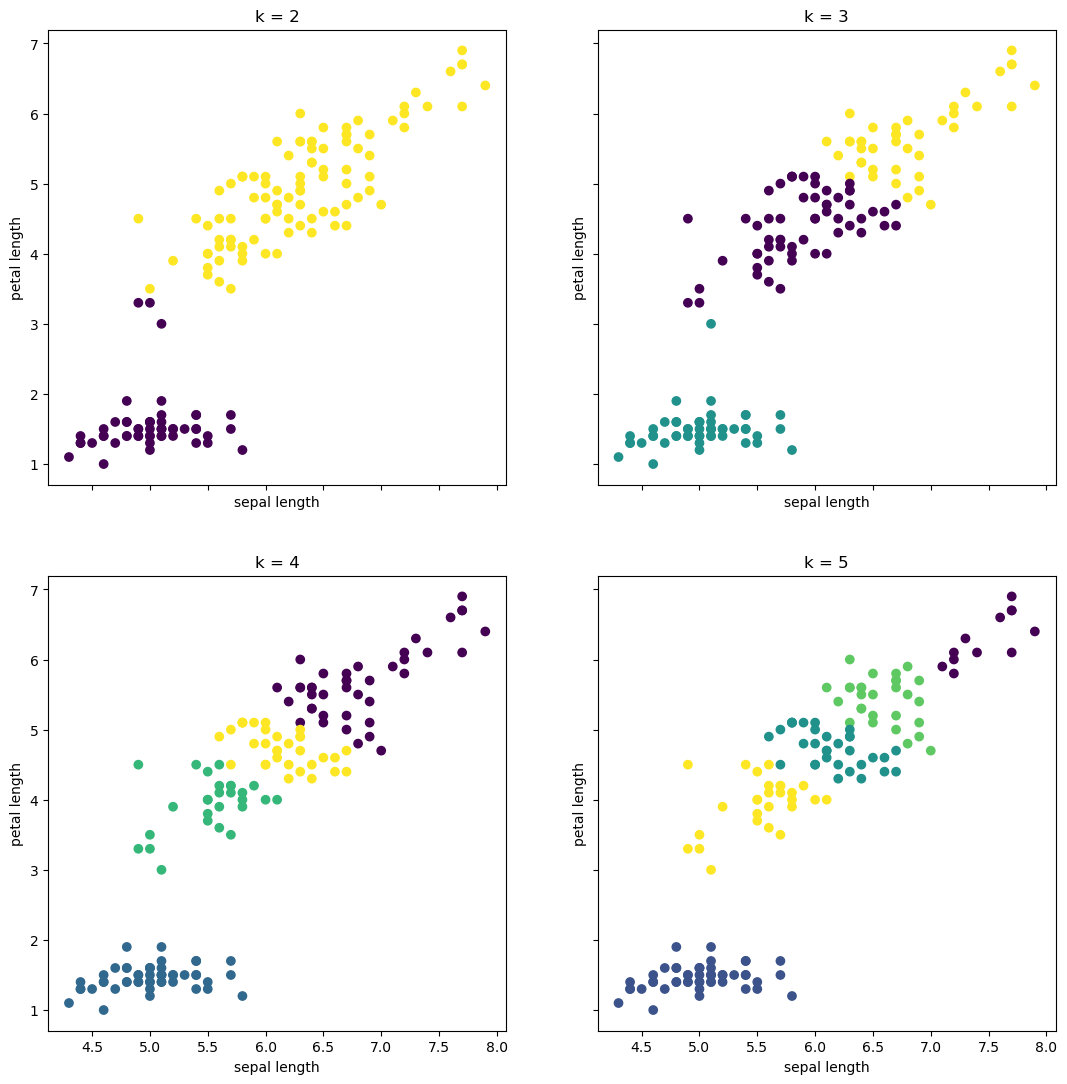

In [25]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

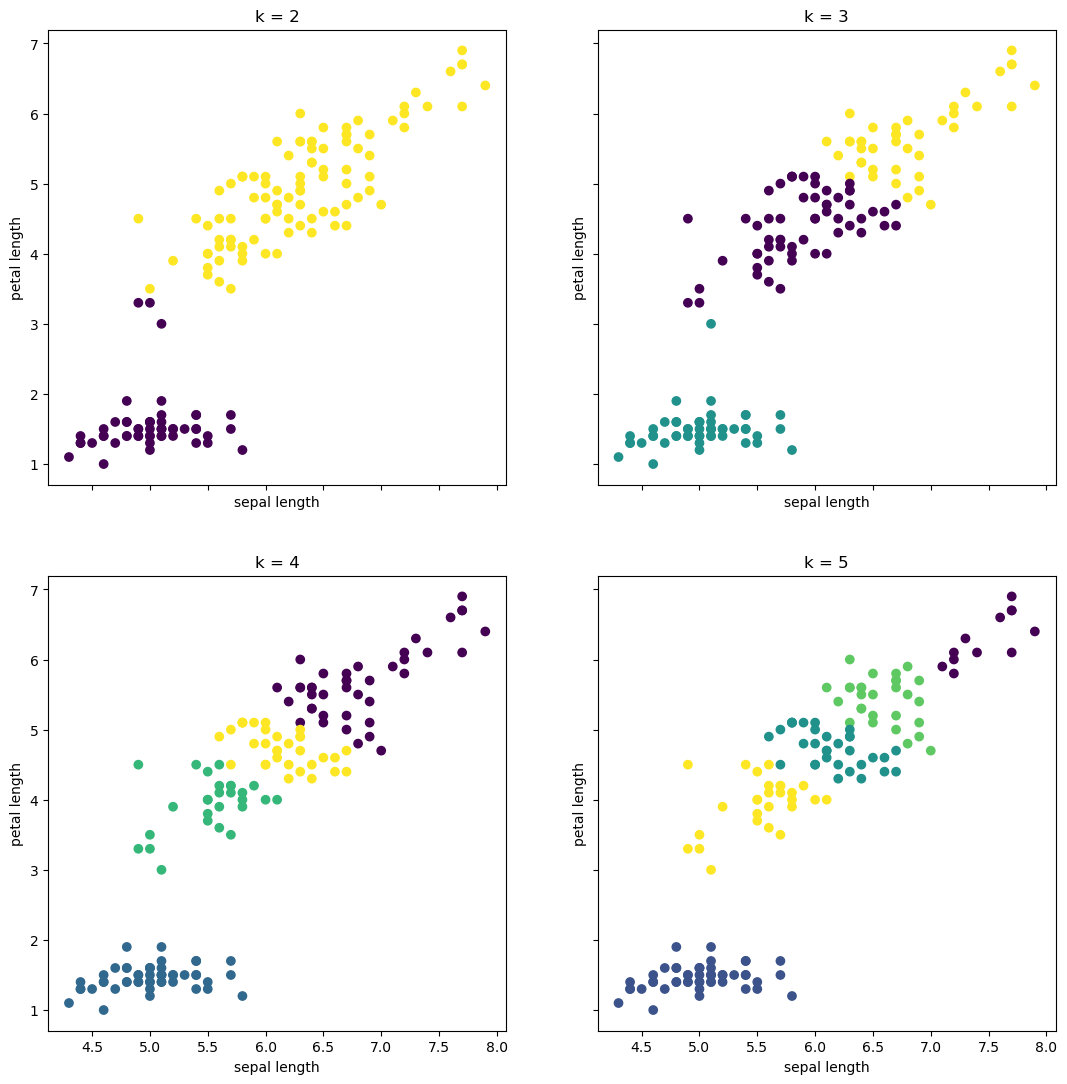

In [25]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

In [32]:
def create_cluster(train, X, k):
    """    
    This function takes in:
        - train
        - X (dataframe with variables you want to cluster on) and 
        - k number of clusters
    - It scales the X
    - calcuates the clusters 
    - returns:  
        - train (with clusters), 
        - the Scaled dataframe,
        - the scaler and kmeans object and 
        - unscaled centroids as a dataframe
    """

    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 539)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    train['cluster'] = kmeans.predict(X_scaled)
    train['cluster'] = 'cluster_' + train.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    return train, X_scaled, scaler, kmeans, centroids


def create_scatter_plot(x,y,train,kmeans, X_scaled, scaler):
    # takes in x and y (variable names as strings, along with returned objects from previous
    # fuction create_cluster and creates a plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = train, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')